In [30]:
import tensorflow as tf

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [33]:
X_valid = X_train_full[:5000]/255.0
y_valid = y_train_full[:5000]
X_train = X_train_full[5000:]/255.0
y_train = y_train_full[5000:]
X_test = X_test/255.0


X_valid = X_valid[...,np.newaxis]
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [34]:
from functools import partial

In [35]:
my_dense_layer = partial(tf.keras.layers.Dense, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="tanh",padding="valid")

In [36]:
model = tf.keras.models.Sequential([
    my_conv_layer(128,5,input_shape=[28,28,1]),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    my_conv_layer(156,3),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    my_conv_layer(156,3),
    tf.keras.layers.Flatten(),
    my_dense_layer(84, activation=None),
    tf.keras.layers.PReLU(),
    my_dense_layer(84, activation=None),
    tf.keras.layers.PReLU(),
    my_dense_layer(10,activation = "softmax")
])

In [37]:
def scheduler(epoch):
    if epoch>5:
        return 0.0005
    else:
        return 0.0005*tf.math.exp(0.2*(5-epoch))

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [39]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(X_train,y_train,epochs = 15, callbacks=[callback], validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 72s 1ms/sample - loss: 0.6231 - accuracy: 0.8152 - val_loss: 0.4588 - val_accuracy: 0.8644
Epoch 2/15
55000/55000 [==============================] - 71s 1ms/sample - loss: 0.4109 - accuracy: 0.8735 - val_loss: 0.3917 - val_accuracy: 0.8776
Epoch 3/15
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.3548 - accuracy: 0.8895 - val_loss: 0.3750 - val_accuracy: 0.8790
Epoch 4/15
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.3166 - accuracy: 0.9019 - val_loss: 0.3201 - val_accuracy: 0.8974
Epoch 5/15
55000/55000 [==============================] - 71s 1ms/sample - loss: 0.2839 - accuracy: 0.9131 - val_loss: 0.3035 - val_accuracy: 0.9034
Epoch 6/15
55000/55000 [==============================] - 68s 1ms/sample - loss: 0.2564 - accuracy: 0.9230 - val_loss: 0.2975 - val_accuracy: 0.9072
Epoch 7/15
55000/55000 [==============================] -

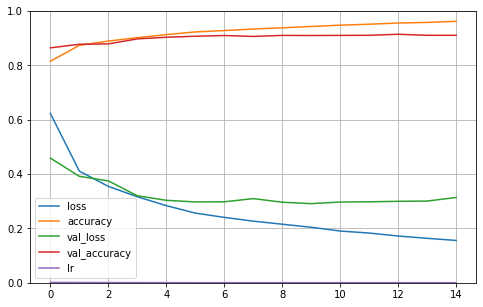

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig('learning.pdf')

In [41]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train,y_pred)
print(pd.DataFrame(conf_train))

      0     1     2     3     4     5     6     7     8     9
0  5347     0    45    29     3     0   115     0     4     0
1     0  5416     1    20     5     0     0     0     2     0
2    57     0  5274    22   100     0    43     0     0     0
3    32     1     1  5406    43     0    16     0     0     0
4     3     0    86    31  5321     0    68     0     3     0
5     0     0     0     0     0  5484     0     7     1    15
6   428     0   125    54   118     0  4779     0     3     0
7     0     0     0     0     0     2     0  5441     0    45
8     7     1     1     0     5     0     2     0  5493     1
9     0     0     0     0     0     2     0    61     0  5431
[[  0   0  45  29   3   0 115   0   4   0]
 [  0   0   1  20   5   0   0   0   2   0]
 [ 57   0   0  22 100   0  43   0   0   0]
 [ 32   1   1   0  43   0  16   0   0   0]
 [  3   0  86  31   0   0  68   0   3   0]
 [  0   0   0   0   0   0   0   7   1  15]
 [428   0 125  54 118   0   0   0   3   0]
 [  0   0   0   0

In [42]:
pd.DataFrame(history.history)['val_accuracy'].max()

0.9143999814987183

In [44]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 334us/sample - loss: 0.3263 - accuracy: 0.9120


[0.32626955037117006, 0.912]

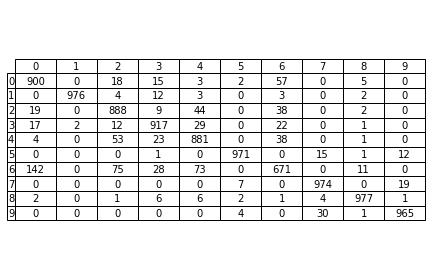

In [47]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test,y_pred)
df = pd.DataFrame(conf_test)
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values,rowLabels=np.arange(10),colLabels=np.arange(10),loc='center',cellLoc='center')
fig.tight_layout()
plt.savefig('conf_matr.pdf')